In [8]:
# Define colums that be used in the model
# prom (prom subcompany*empleado + #tickets) -> card_value
#Se buscara predecir la dificultad desde el inicio del desarrollo de la card hasta que empezo a generar ganancias

In [319]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [257]:
task_data = pd.read_csv("task_data_detail.csv", sep='\s*,\s*',header=0, encoding='ascii', engine='python')
task_data.head()

,CARD ID,difficult,number_of_cards_in_sprint,standard_acceptance_requirements,clients_requirements,card_value,first_big_concept,second_big_concept,is_backend,avg_seniority_back,is_frontend,avg_seniority_frontend,is_feature,is_hotfix,is_improvement
0,RUNA-662,hard,10,7,4,476,payroll,kardex,Si,0.4,No,0.70,Si,No,No
1,RUNA-38,easy,8,8,5,350,payroll,isn,Si,0.5,Si,0.60,No,Si,No
2,RUNA-571,easy,12,3,6,120,payroll,employees,Si,0.8,Si,0.65,No,Si,No
3,RUNA-40,hard,13,3,4,456,outsourcer,company,Si,0.7,Si,0.70,No,No,Si


In [28]:
# task_data.info()

In [100]:
def print_means(data, difficult):
    print("Difficult: " + difficult)
    is_difficult =  data['difficult']== difficult
    difficult_cards = data[is_hard]
    print(difficult_cards.mean())
    print("===============================")

In [101]:
print_means(task_data, 'hard')
print_means(task_data, 'medium')
print_means(task_data, 'easy')

Difficult: hard
number_of_cards_in_sprint            11.50
standard_acceptance_requirements      5.00
clients_requirements                  4.00
card_value                          466.00
avg_seniority_back                    0.55
avg_seniority_frontend                0.70
dtype: float64
Difficult: medium
number_of_cards_in_sprint            11.50
standard_acceptance_requirements      5.00
clients_requirements                  4.00
card_value                          466.00
avg_seniority_back                    0.55
avg_seniority_frontend                0.70
dtype: float64
Difficult: easy
number_of_cards_in_sprint            11.50
standard_acceptance_requirements      5.00
clients_requirements                  4.00
card_value                          466.00
avg_seniority_back                    0.55
avg_seniority_frontend                0.70
dtype: float64


In [102]:
def fill_null_values_with_means(data, column):
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].mean()[0])

In [103]:
def fill_null_values_with_mode(data, column):
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].mode()[0])

In [104]:
def replace_boolean_values_by_binary_values(data, column, replace_dict):
    data[column].map(replace_dict)

In [258]:
#Complete empty values with means
fill_null_values_with_mode(task_data, 'number_of_cards_in_sprint')
fill_null_values_with_means(task_data, 'standard_acceptance_requirements')
fill_null_values_with_means(task_data, 'clients_requirements')
fill_null_values_with_means(task_data, 'card_value')
fill_null_values_with_mode(task_data, 'avg_seniority_back')
fill_null_values_with_mode(task_data, 'avg_seniority_frontend')

In [259]:
#Replace boolean values by binary
boolean_dicts = {
    'No' :0,
    'Si' :1
}
task_data.is_backend = task_data.is_backend.map(boolean_dicts)
task_data.is_frontend = task_data.is_frontend.map(boolean_dicts)
task_data.is_feature = task_data.is_feature.map(boolean_dicts)
task_data.is_hotfix = task_data.is_hotfix.map(boolean_dicts)
task_data.is_improvement = task_data.is_improvement.map(boolean_dicts)
task_data

,CARD ID,difficult,number_of_cards_in_sprint,standard_acceptance_requirements,clients_requirements,card_value,first_big_concept,second_big_concept,is_backend,avg_seniority_back,is_frontend,avg_seniority_frontend,is_feature,is_hotfix,is_improvement
0,RUNA-662,hard,10,7,4,476,payroll,kardex,1,0.4,0,0.70,1,0,0
1,RUNA-38,easy,8,8,5,350,payroll,isn,1,0.5,1,0.60,0,1,0
2,RUNA-571,easy,12,3,6,120,payroll,employees,1,0.8,1,0.65,0,1,0
3,RUNA-40,hard,13,3,4,456,outsourcer,company,1,0.7,1,0.70,0,0,1


Text(0,0.5,'Frequency')

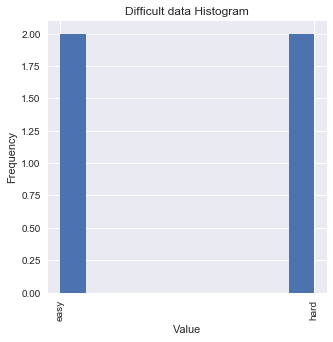

In [225]:
#Data difficult distribution
difficult_task_data = task_data['difficult']
plt.figure(figsize=(5,5))
plt.hist(difficult_task_data)
plt.xticks(rotation=90)
plt.title("Difficult data Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [226]:
def plot_data_by_difficult(data, difficult, column):
    is_difficult =  task_data['difficult']== difficult
    difficult_cards = task_data[is_hard]
    sns.set(); 
    x = difficult_cards[column].values
    ax = sns.distplot(x)

In [227]:
def plot_data_by_difficult_by_concept(data, difficult):
    is_difficult =  data['difficult']== difficult
    difficult_cards = data[is_hard]
    difficult_cards.first_big_concept.hist(alpha=0.4)

In [190]:
# plot_data_by_difficult(task_data, 'hard', 'standard_acceptance_requirements')

In [191]:
# plot_data_by_difficult(task_data, 'hard', 'card_value')

In [192]:
# plot_data_by_difficult(task_data, 'medium', 'number_of_cards_in_sprint')

In [193]:
# plot_data_by_difficult(task_data, 'medium', 'standard_acceptance_requirements')

In [194]:
# plot_data_by_difficult(task_data, 'easy', 'number_of_cards_in_sprint')

In [195]:
# plot_data_by_difficult(task_data, 'easy', 'standard_acceptance_requirements')

In [260]:
def normalize_data(data, difficult, columns):
    is_difficult =  task_data['difficult']== difficult
    difficult_cards = task_data[is_hard]
    for column in columns:
        max_value = task_data[column].max()
        min_value = task_data[column].min()
        task_data[column] = (task_data[column] - min_value) / (max_value - min_value)

In [261]:
normalize_data(task_data, 'hard', ['card_value', 'number_of_cards_in_sprint', 'standard_acceptance_requirements'])

In [262]:
normalize_data(task_data, 'medium', ['card_value', 'number_of_cards_in_sprint', 'standard_acceptance_requirements'])

In [263]:
normalize_data(task_data, 'easy', ['card_value', 'number_of_cards_in_sprint', 'standard_acceptance_requirements'])

In [264]:
task_data

,CARD ID,difficult,number_of_cards_in_sprint,standard_acceptance_requirements,clients_requirements,card_value,first_big_concept,second_big_concept,is_backend,avg_seniority_back,is_frontend,avg_seniority_frontend,is_feature,is_hotfix,is_improvement
0,RUNA-662,hard,0.4,0.8,4,1.000000,payroll,kardex,1,0.4,0,0.70,1,0,0
1,RUNA-38,easy,0.0,1.0,5,0.646067,payroll,isn,1,0.5,1,0.60,0,1,0
2,RUNA-571,easy,0.8,0.0,6,0.000000,payroll,employees,1,0.8,1,0.65,0,1,0
3,RUNA-40,hard,1.0,0.0,4,0.943820,outsourcer,company,1,0.7,1,0.70,0,0,1


In [266]:
# plot_data_by_difficult(task_data, 'hard', 'number_of_cards_in_sprint')

In [197]:
# plot_data_by_difficult(task_data, 'hard', 'number_of_cards_in_sprint')

In [198]:
# plot_data_by_difficult_by_concept(task_data, 'hard')

In [267]:
difficult_as_a_class = {
    'hard'     :0,
    'medium'   :1,
    'easy'     :2
}

task_data.difficult = task_data.difficult.map(difficult_as_a_class)
task_data

,CARD ID,difficult,number_of_cards_in_sprint,standard_acceptance_requirements,clients_requirements,card_value,first_big_concept,second_big_concept,is_backend,avg_seniority_back,is_frontend,avg_seniority_frontend,is_feature,is_hotfix,is_improvement
0,RUNA-662,0,0.4,0.8,4,1.000000,payroll,kardex,1,0.4,0,0.70,1,0,0
1,RUNA-38,2,0.0,1.0,5,0.646067,payroll,isn,1,0.5,1,0.60,0,1,0
2,RUNA-571,2,0.8,0.0,6,0.000000,payroll,employees,1,0.8,1,0.65,0,1,0
3,RUNA-40,0,1.0,0.0,4,0.943820,outsourcer,company,1,0.7,1,0.70,0,0,1


In [297]:
difficult_by_concepts = {
    'payroll'     :0,
    'kardex'      :1,
    'isn'         :2,
    'employees'   :3,
    'outsourcer'  :4,
    'company'     :5
}

task_data.first_big_concept = task_data.first_big_concept.map(difficult_by_concepts)
task_data.second_big_concept = task_data.second_big_concept.map(difficult_by_concepts)
task_data

,difficult,number_of_cards_in_sprint,standard_acceptance_requirements,clients_requirements,card_value,first_big_concept,second_big_concept,is_backend,avg_seniority_back,is_frontend,avg_seniority_frontend,is_feature,is_hotfix,is_improvement
0,0,0.4,0.8,4,1.000000,0,1,1,0.4,0,0.70,1,0,0
1,2,0.0,1.0,5,0.646067,0,2,1,0.5,1,0.60,0,1,0
2,2,0.8,0.0,6,0.000000,0,3,1,0.8,1,0.65,0,1,0
3,0,1.0,0.0,4,0.943820,4,5,1,0.7,1,0.70,0,0,1


In [ ]:
del task_data['CARD ID']

In [298]:
X = task_data.drop('difficult', axis=1)
y = task_data['difficult']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [300]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [326]:
y_pred = svclassifier.predict(X_test)

In [307]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1.]]


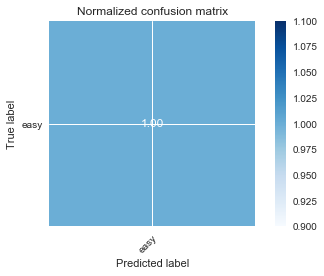

In [341]:
class_names = np.array(list(difficult_as_a_class.keys()))
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [306]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          2       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1

